# In-Company Project 2020 
# Viking Line Assembly Cell PUA/ MD
PUA: Power Unit Assembly \
MD: Main Dedication 

## Established 26.08.2020



This notebook is an initial work environment test shared between my Danfoss PC, Home Desktop and Personal Laptop. 


## Workflow 

- the data will originate from either of two servers: 
        - dkdn01db192
        - dkgra01db08
- the databases will be: 
        - sqlhotel.sccs_gra_vk_small
        - sqlhoteltest.sccs_gra_vk_small_dev

### Get Latest Data from database
Due to the read/write access this will be done manually via Microsoft SQL Server Managment Studio.\ 
The data from the databases and tables of interest will be saved as .csv files locally on my computer - here they are safe from accidental manipulation!

EDIT September 2020:\
By now I only have read access to the database so some analysis can also be done in Power BI 

### Converting to pandas dataframe 




In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import sklearn

from matplotlib import pyplot as plt 


 columns=["Id", "UnitPartNo", "UnitSnNO", "TimeStamp", "Seq", "PN", "PT", "RC", "T1", "RA", "RD", "ET", "CN", "ScrewdriverID"]
 

In [3]:
df = pd.read_csv('screwdriverstatisticsII.csv', sep='\s+', delimiter=';', header=0, parse_dates=True, squeeze=True, decimal=",")
df.head(100)

,Id,UnitPartNo,UnitSnNo,TimeStamp,Seq,PN,PT,RC,T1,T2,RA,RD,ET,CN,ScrewdriverId
0,43,136U3748,MICHAEL,2020-08-07 11:58:55.5990000,1,2,0,1,2.041774,1.517809,5.277778,29.957031,1.023992,1.197830e-41,2
1,44,136U3748,MICHAEL,2020-08-07 11:58:55.6000000,2,2,0,1,2.007969,1.527950,11.111112,29.550781,1.009991,1.197970e-41,2
2,45,136U3748,MICHAEL,2020-08-07 11:58:55.6010000,3,2,0,1,2.015575,1.511048,9.444445,29.996094,1.001991,1.198110e-41,2
3,46,136U3748,MICHAEL,2020-08-07 11:58:55.6020000,4,2,0,10,0.087891,0.087891,7073.333496,48.316406,3.017964,1.198250e-41,2
4,47,136U3748,MICHAEL,2020-08-07 11:58:55.6040000,5,2,0,1,2.012195,1.211881,246.666672,32.839844,2.453005,1.198390e-41,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,138,136U3748,MICHAEL,2020-08-18 12:47:26.0340000,16,2,0,1,2.025717,1.231318,13.055556,51.117188,0.572996,1.199932e-41,2
96,139,136U3748,MICHAEL,2020-08-18 12:51:18.2400000,1,2,0,1,2.041774,1.517809,5.277778,29.957031,1.023992,1.197830e-41,2
97,140,136U3748,MICHAEL,2020-08-18 12:51:18.2400000,2,2,0,1,2.007969,1.527950,11.111112,29.550781,1.009991,1.197970e-41,2
98,141,136U3748,MICHAEL,2020-08-18 12:51:18.2400000,3,2,0,1,2.015575,1.511048,9.444445,29.996094,1.001991,1.198110e-41,2


In [4]:
df.columns

Index(['Id', 'UnitPartNo', 'UnitSnNo', 'TimeStamp', 'Seq', 'PN', 'PT', 'RC',
       'T1', 'T2', 'RA', 'RD', 'ET', 'CN', 'ScrewdriverId'],
      dtype='object')

In [5]:
df.set_index('Id')

,UnitPartNo,UnitSnNo,TimeStamp,Seq,PN,PT,RC,T1,T2,RA,RD,ET,CN,ScrewdriverId
Id,,,,,,,,,,,,,,
43,136U3748,MICHAEL,2020-08-07 11:58:55.5990000,1,2,0,1,2.041774,1.517809,5.277778,29.957031,1.023992,1.197830e-41,2
44,136U3748,MICHAEL,2020-08-07 11:58:55.6000000,2,2,0,1,2.007969,1.527950,11.111112,29.550781,1.009991,1.197970e-41,2
45,136U3748,MICHAEL,2020-08-07 11:58:55.6010000,3,2,0,1,2.015575,1.511048,9.444445,29.996094,1.001991,1.198110e-41,2
46,136U3748,MICHAEL,2020-08-07 11:58:55.6020000,4,2,0,10,0.087891,0.087891,7073.333496,48.316406,3.017964,1.198250e-41,2
47,136U3748,MICHAEL,2020-08-07 11:58:55.6040000,5,2,0,1,2.012195,1.211881,246.666672,32.839844,2.453005,1.198390e-41,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,136Z8917,DG000007,2020-08-27 13:38:54.2170000,12,2,0,1,2.053605,1.214416,9.444445,45.332031,1.015991,1.202034e-41,2
665,136Z8917,DG000007,2020-08-27 13:38:54.2170000,13,2,0,1,2.045999,1.216106,7.500000,45.710938,1.020992,1.202174e-41,2
666,136Z8917,DG000007,2020-08-27 13:38:54.2170000,14,2,0,1,2.007124,1.256671,3.611111,46.406250,1.271003,1.202314e-41,2


## Cleaning the dataset
checking for empty values and removing them 

edit: There are no null values and no "unnecessary" empty columns - this speaks for a good and clean dataset. 

In [6]:
df.isnull().values.any()

False

In [7]:
df.isnull().sum()

Id               0
UnitPartNo       0
UnitSnNo         0
TimeStamp        0
Seq              0
PN               0
PT               0
RC               0
T1               0
T2               0
RA               0
RD               0
ET               0
CN               0
ScrewdriverId    0
dtype: int64

### Convert to use best dtypes

In [8]:
df = df.convert_dtypes()
df.dtypes

Id                 Int64
UnitPartNo        string
UnitSnNo          string
TimeStamp         string
Seq                Int64
PN                 Int64
PT                 Int64
RC                 Int64
T1               float64
T2               float64
RA               float64
RD               float64
ET               float64
CN               float64
ScrewdriverId      Int64
dtype: object

## Visual inspection of the dataset 

while not all plots will make sense the sns.pairplot tool is good to quickly generate a visual output of the data

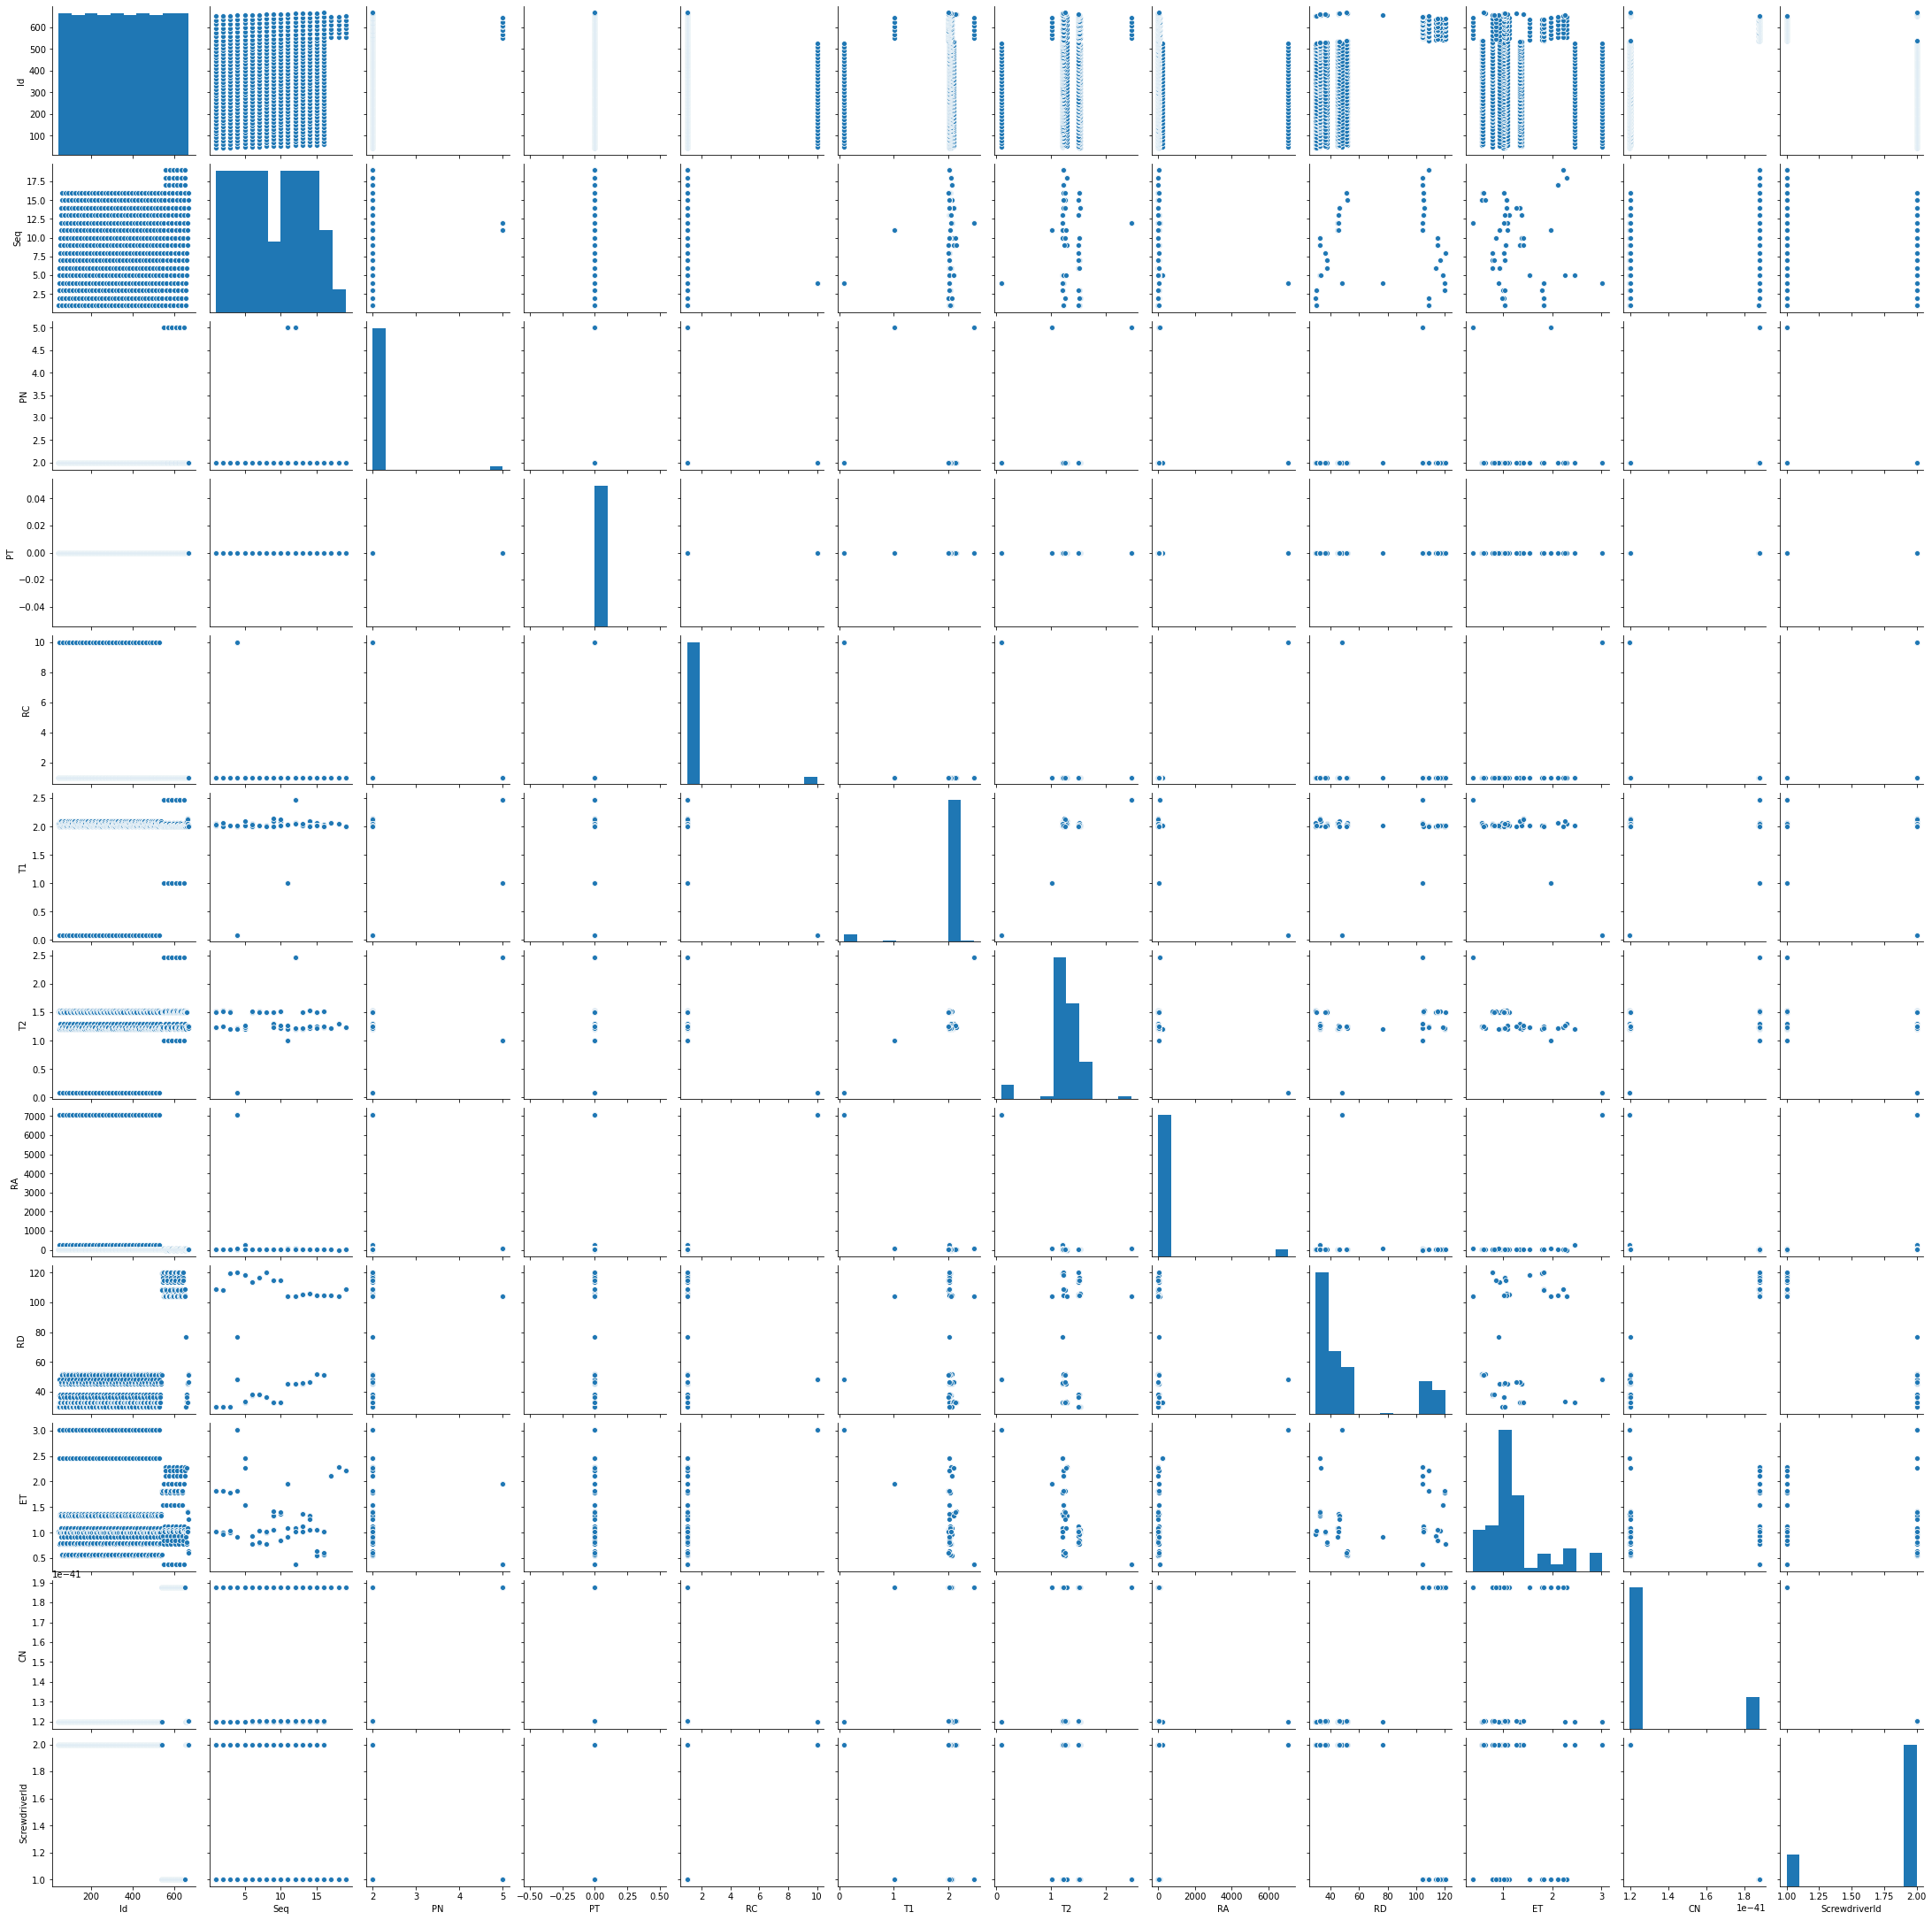

In [9]:
#sns.pairplot(df, hue='UnitPartNo') #used to work exatcly like this until 22.10.2020 just ran the notebook one day and this didnt work anymore
sns.pairplot(df)

# Extracting the Sub-Dataset where operation succeeded

the RC value can be used as a label for the training data as it describes the success of a screwing operation. The next step will filter the RC values. Only RC = 1 means a successful operation. 

In [10]:
successful_df = df[df['RC']==1]
successful_df.shape


(595, 15)

In [11]:
successful_df.head(3)

,Id,UnitPartNo,UnitSnNo,TimeStamp,Seq,PN,PT,RC,T1,T2,RA,RD,ET,CN,ScrewdriverId
0,43,136U3748,MICHAEL,2020-08-07 11:58:55.5990000,1,2,0,1,2.041774,1.517809,5.277778,29.957031,1.023992,1.197830e-41,2
1,44,136U3748,MICHAEL,2020-08-07 11:58:55.6000000,2,2,0,1,2.007969,1.527950,11.111112,29.550781,1.009991,1.197970e-41,2
2,45,136U3748,MICHAEL,2020-08-07 11:58:55.6010000,3,2,0,1,2.015575,1.511048,9.444445,29.996094,1.001991,1.198110e-41,2


##  Categorizing product types - UnitPartNo 
This will indicate how many different product types are produced and what the different torque values are for the drives.\
Graph will become more relevant with increasing part number count.\
screwdriverstatistics one only has one type of product, while screwdriverstatisticsII already has 4.

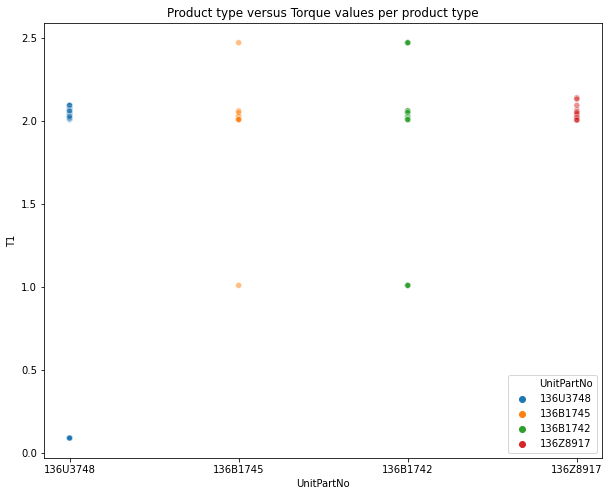

Size of UnitPartNo:  626
Amount of unique values - amount of different products:  UnitPartNo
136B1742     95
136B1745     19
136U3748    496
136Z8917     16
Name: Id, dtype: int64


In [15]:
plt.figure(figsize=(10,8))
ax = sns.scatterplot(x='UnitPartNo', y='T1',hue='UnitPartNo',  data=df, alpha = .5)
ax.set_title("Product type versus Torque values per product type")
#for i, txt in enumerate(df['Seq']):
#    ax.annotate(txt, (df['UnitPartNo'], df['T1']))
plt.show()
size = df['UnitPartNo'].size
NumberOfProductTypes = df.groupby('UnitPartNo')['Id'].nunique()
print("Size of UnitPartNo: ", size)
print("Amount of unique values - amount of different products: ", NumberOfProductTypes) 

## Visualizing the Sequence steps per product 
this can later be used for Sequence-step-series

Text(0.5, 1.0, 'Sequence steps per product type')

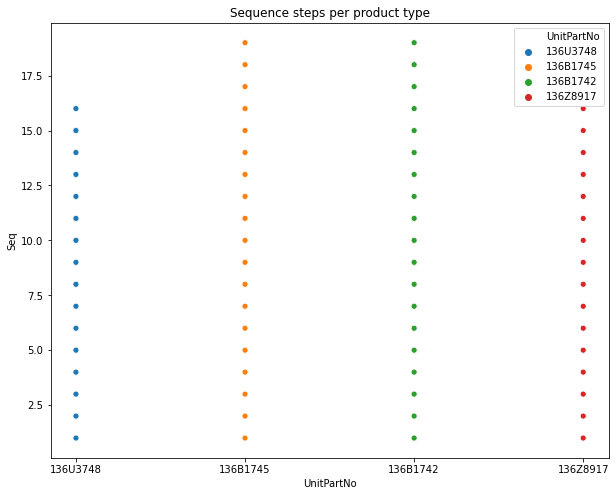

In [16]:
plt.figure(figsize=(10,8))
ax = sns.scatterplot(x='UnitPartNo', y='Seq',hue='UnitPartNo', data=df,)
ax.set_title("Sequence steps per product type")
#ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

# Mapping all Measurements per UnitPartNo

## 1) T1 and T2 Values per UnitPartNo

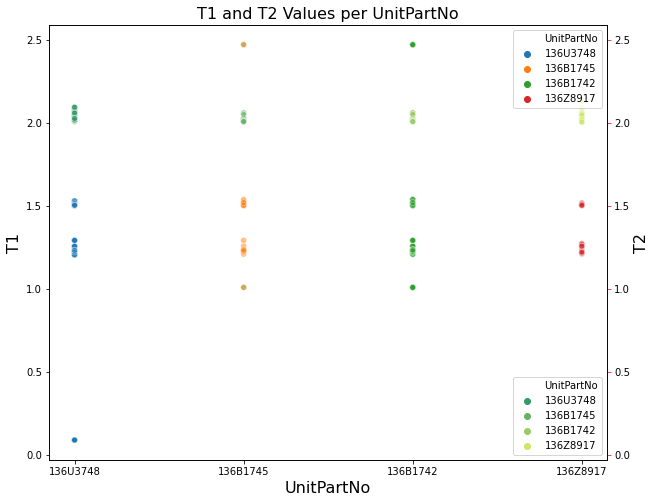

In [17]:
#Create combo chart
fig, ax1 = plt.subplots(figsize=(10,8))
color = 'tab:green'
#bar plot creation
ax1.set_title('T1 and T2 Values per UnitPartNo', fontsize=16)
ax1.set_xlabel('UnitPartNo', fontsize=16)
ax1.set_ylabel('Torque (Nm)', fontsize=16)
ax1 = sns.scatterplot(x='UnitPartNo', y='T1',hue='UnitPartNo', data = df, palette='summer', alpha = .6)
ax1.tick_params(axis='y')
#specify we want to share the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'
#line plot creation
ax2.set_ylabel('Torque Values in Nm', fontsize=16)
ax2 = sns.scatterplot(x='UnitPartNo', y='T2',hue='UnitPartNo', data = df, color=color, alpha = .5)
ax2.tick_params(axis='y', color=color)
#show plot
plt.show()

## 2) Result Angle (RA) per UnitPartNo

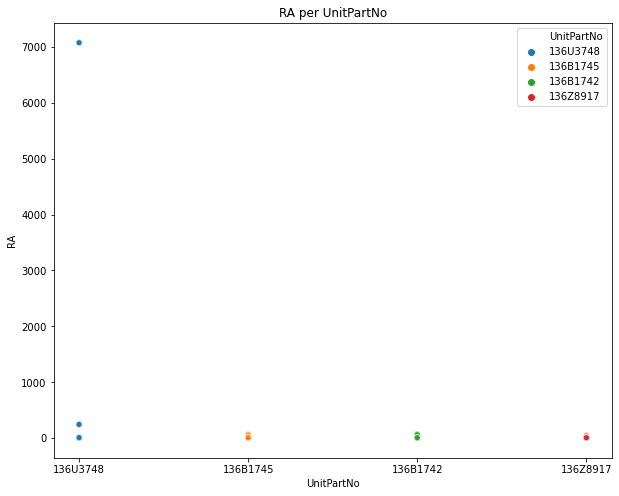

In [18]:
plt.figure(figsize=(10,8))
ax = sns.scatterplot(x='UnitPartNo', y='RA',hue='UnitPartNo', data=df, alpha = .5)
ax.set_title("RA per UnitPartNo")
plt.show()

## 3) Result Depth (RD) per UnitPartNo 

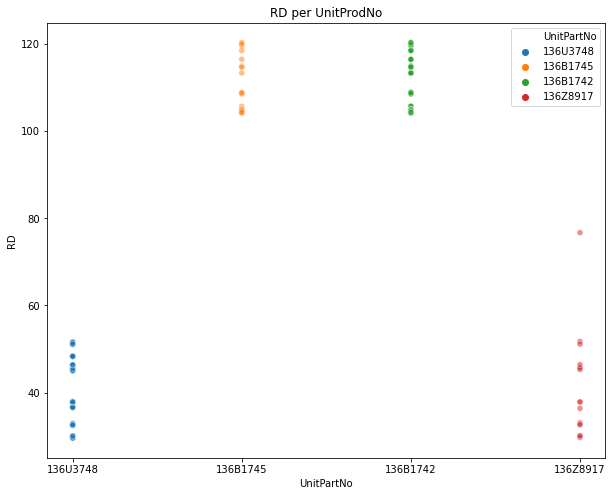

In [19]:
plt.figure(figsize=(10,8))
ax = sns.scatterplot(x='UnitPartNo', y='RD',hue='UnitPartNo', data=df, alpha = .5)
ax.set_title("RD per UnitProdNo")
plt.show()

## 4) Execution Time (ET) (?) per UnitPartNo

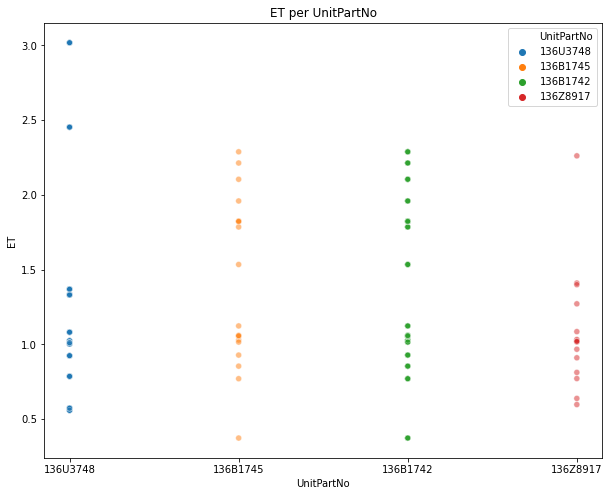

In [20]:
plt.figure(figsize=(10,8))
ax = sns.scatterplot(x='UnitPartNo', y='ET',hue='UnitPartNo', data=df, alpha = .5)
ax.set_title("ET per UnitPartNo")
plt.show()

# Mapping all measurements per Sequence 
### Time series could be an alternative allthough the TimeStamp values are not ideal 

For this it is required to correctly set dtypes of all columns.\
Currently this is not really time series-data but rather the sequence steps of the assembly.\
For this to become a "real" time-series analysis it is important that the timestamps in the dataset are reliably set (not bunch set). 


Text(0.5, 1.0, 'Torque Values 1 per sequence step')

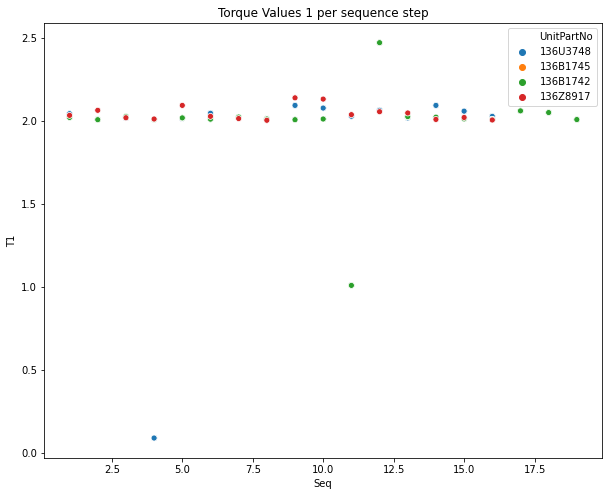

In [21]:
plt.figure(figsize=(10,8))
ax = sns.scatterplot(x='Seq', y='T1', data=df,hue='UnitPartNo')
ax.set_title("Torque Values 1 per sequence step")
#ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

## 1) T1 and T2 values per Sequence step 

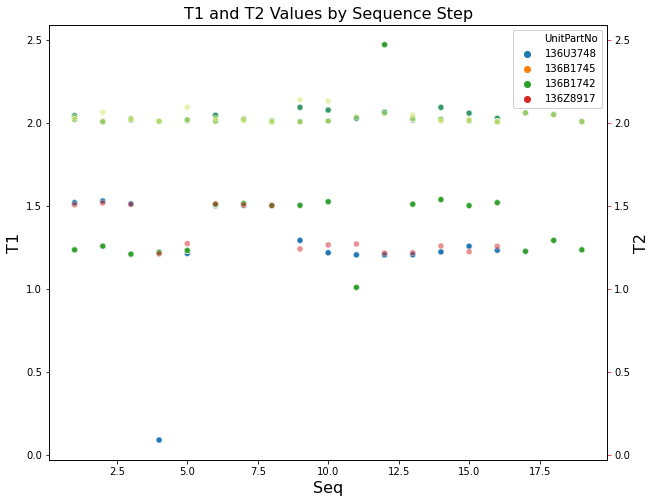

In [22]:
#Create combo chart
fig, ax1 = plt.subplots(figsize=(10,8))
color = 'tab:green'
#bar plot creation
ax1.set_title('T1 and T2 Values by Sequence Step', fontsize=16)
ax1.set_xlabel('Seq', fontsize=16)
ax1.set_ylabel('Torque (Nm)', fontsize=16)
ax1 = sns.scatterplot(x='Seq', y='T1',hue='UnitPartNo', data = df, palette='summer', alpha = .5)
ax1.tick_params(axis='y')
#specify we want to share the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'
#line plot creation
ax2.set_ylabel('Torque Values in Nm', fontsize=16)
ax2 = sns.scatterplot(x='Seq', y='T2',hue='UnitPartNo', data = df, color=color, alpha = .5)
ax2.tick_params(axis='y', color=color)

#show plot
plt.show()

## 2) RA per Sequence step 

Text(0.5, 1.0, 'Result Angle (RA) values per sequence step')

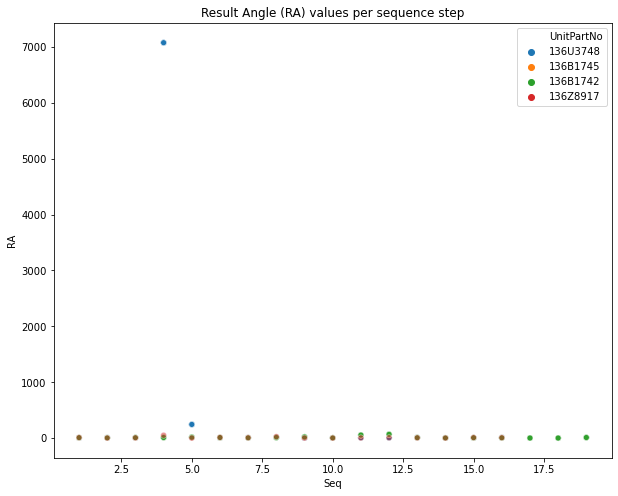

In [23]:
plt.figure(figsize=(10,8))
ax = sns.scatterplot(x='Seq', y='RA',hue='UnitPartNo', data=df, alpha = .5)
ax.set_title("Result Angle (RA) values per sequence step")

## 3) RD per Sequence step

Text(0.5, 1.0, 'Result Depth (RD) values per sequence step')

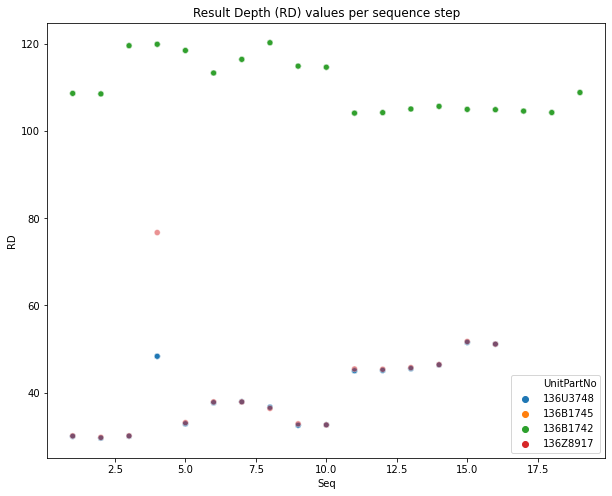

In [24]:
plt.figure(figsize=(10,8))
ax = sns.scatterplot(x='Seq', y='RD',hue='UnitPartNo', data=df, alpha = .5)
ax.set_title("Result Depth (RD) values per sequence step")

## 4) ET per Sequence step 

Text(0.5, 1.0, 'Execution Time (ET) values per sequence step')

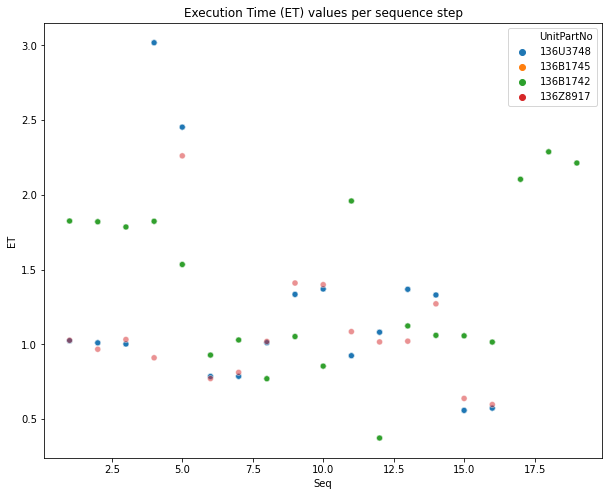

In [25]:
plt.figure(figsize=(10,8))
ax = sns.scatterplot(x='Seq', y='ET',hue='UnitPartNo', data=df, alpha = .5)
ax.set_title("Execution Time (ET) values per sequence step")

# Mapping all data in clusters
clustering the data will give insight into the accuracy of the operation. 
Below the Result Angle (RA) value will be clustered against the Torque Values (T1 & T2) 

## 0) Mapping RA & T1/T2 incl. NOTOK label

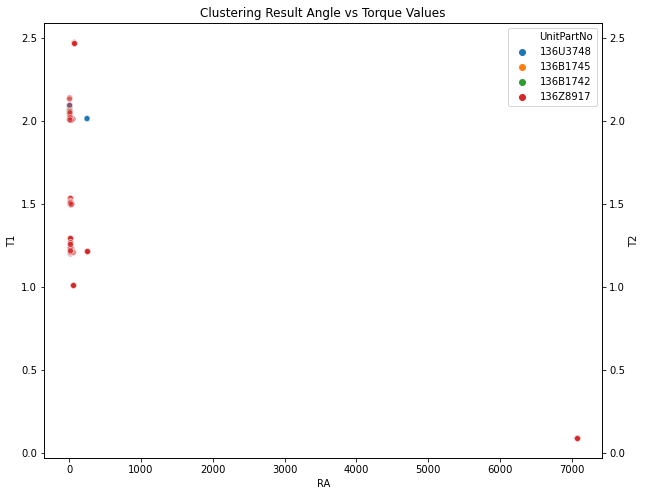

In [26]:
plt.figure(figsize=(10,8))
ax1 = sns.scatterplot(x='RA', y='T1',hue='UnitPartNo',  data=df, alpha = .5, legend='brief')
ax1.set_title("Clustering Result Angle vs Torque Values")

#specify we want to share the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'
ax2 = sns.scatterplot(x='RA', y='T2', data = df,color=color, alpha = .5, legend='brief')

#ax1.legend(handles=ax.lines[::len(df)+1])

## 1) Mapping RA vs. Torque Values (ok values only) 

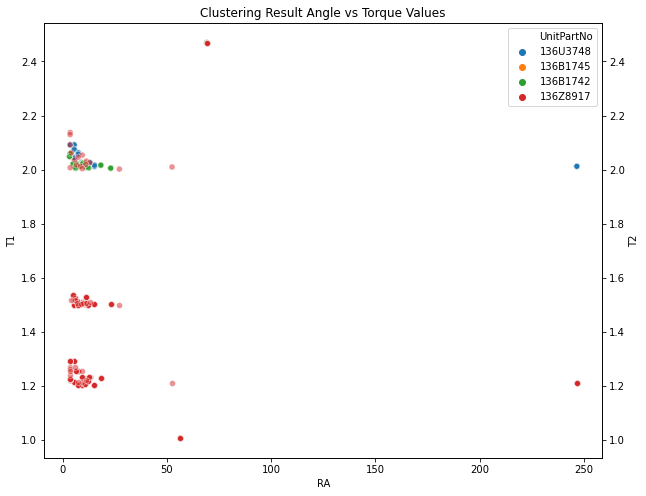

In [27]:
plt.figure(figsize=(10,8))
ax1 = sns.scatterplot(x='RA', y='T1',hue='UnitPartNo',  data=successful_df, alpha = .5, legend='brief')
ax1.set_title("Clustering Result Angle vs Torque Values")

#specify we want to share the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'
ax2 = sns.scatterplot(x='RA', y='T2', data = successful_df,color=color, alpha = .5, legend='brief')

#ax1.legend(handles=ax.lines[::len(df)+1])

## 2) Mapping Depth (RD) to T1/T2 values 

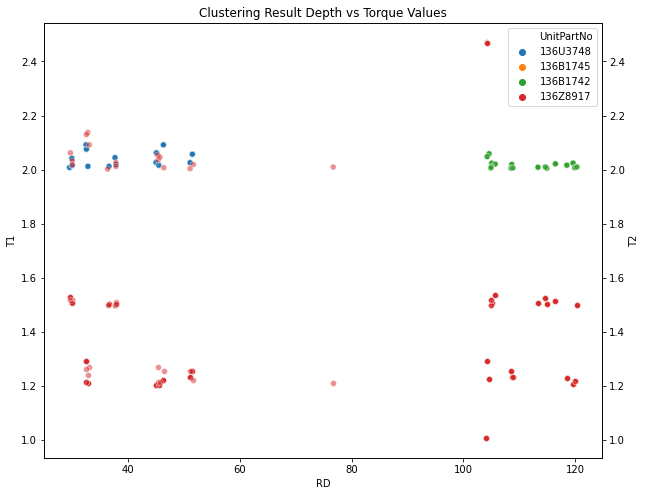

In [28]:
plt.figure(figsize=(10,8))
ax1 = sns.scatterplot(x='RD', y='T1',hue='UnitPartNo', data=successful_df, alpha = .5)
ax1.set_title("Clustering Result Depth vs Torque Values")

#specify we want to share the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'
ax2 = sns.scatterplot(x='RD', y='T2', data = successful_df,color=color, alpha = .5)

#ax1.legend(handles=ax.lines[::len(df)+1])

# "Sequence Series Data"
Looking at the sequence steps 

Text(0.5, 1.0, 'Sequence steps per product type')

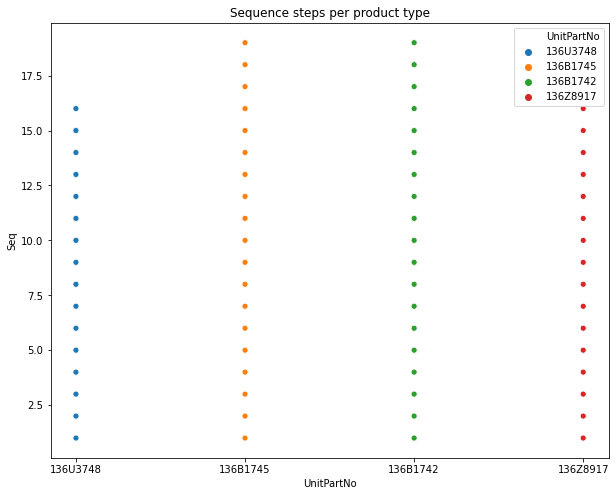

In [29]:
plt.figure(figsize=(10,8))
ax = sns.scatterplot(x='UnitPartNo', y='Seq',hue='UnitPartNo', data=df,)
ax.set_title("Sequence steps per product type")
#ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

# Time series Data 
even though the time stamp is the time of transmission form thingworx to SQL database - the timeseries over a longer period will be useful

Text(0.5, 1.0, 'Sequence steps per product type')

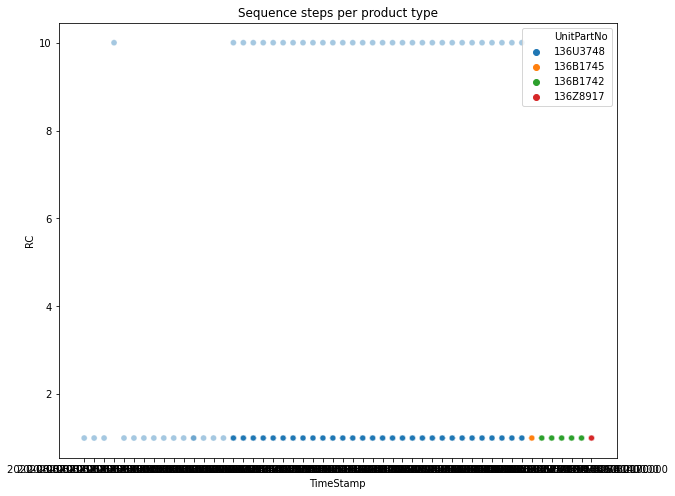

In [30]:
plt.figure(figsize=(10,8))
ax = sns.scatterplot(x='TimeStamp', y='RC',hue='UnitPartNo', data=df, alpha=.4)
ax.set_title("Sequence steps per product type")

Subplots only work in matplotlib

## Looking at each product type individually 

For this to work the dataframe must be filtered for each UnitPartNo.\
This is potentially interesting as it looks at each sequence step per product variance.\

### still under construction - output is not really helpful right now 


In [31]:
type1_df = df[df['UnitPartNo']=='136U3748']
type1_df.head(100)



,Id,UnitPartNo,UnitSnNo,TimeStamp,Seq,PN,PT,RC,T1,T2,RA,RD,ET,CN,ScrewdriverId
0,43,136U3748,MICHAEL,2020-08-07 11:58:55.5990000,1,2,0,1,2.041774,1.517809,5.277778,29.957031,1.023992,1.197830e-41,2
1,44,136U3748,MICHAEL,2020-08-07 11:58:55.6000000,2,2,0,1,2.007969,1.527950,11.111112,29.550781,1.009991,1.197970e-41,2
2,45,136U3748,MICHAEL,2020-08-07 11:58:55.6010000,3,2,0,1,2.015575,1.511048,9.444445,29.996094,1.001991,1.198110e-41,2
3,46,136U3748,MICHAEL,2020-08-07 11:58:55.6020000,4,2,0,10,0.087891,0.087891,7073.333496,48.316406,3.017964,1.198250e-41,2
4,47,136U3748,MICHAEL,2020-08-07 11:58:55.6040000,5,2,0,1,2.012195,1.211881,246.666672,32.839844,2.453005,1.198390e-41,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,138,136U3748,MICHAEL,2020-08-18 12:47:26.0340000,16,2,0,1,2.025717,1.231318,13.055556,51.117188,0.572996,1.199932e-41,2
96,139,136U3748,MICHAEL,2020-08-18 12:51:18.2400000,1,2,0,1,2.041774,1.517809,5.277778,29.957031,1.023992,1.197830e-41,2
97,140,136U3748,MICHAEL,2020-08-18 12:51:18.2400000,2,2,0,1,2.007969,1.527950,11.111112,29.550781,1.009991,1.197970e-41,2
98,141,136U3748,MICHAEL,2020-08-18 12:51:18.2400000,3,2,0,1,2.015575,1.511048,9.444445,29.996094,1.001991,1.198110e-41,2


NameError: name 'x' is not defined

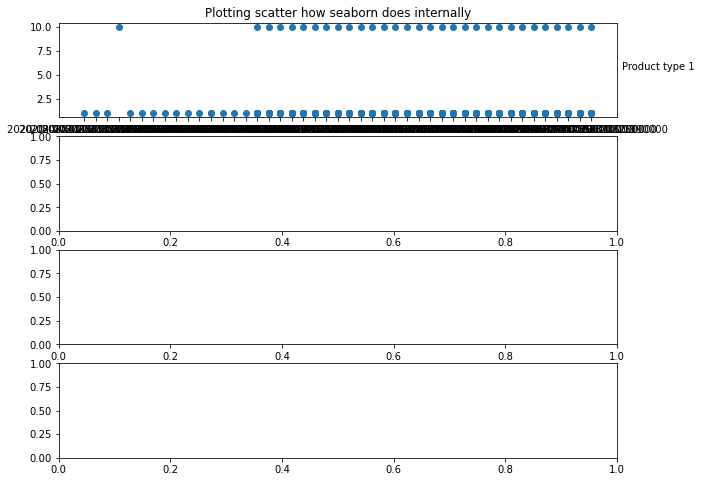

In [32]:
fig, axes = plt.subplots(4, 1, figsize=(10, 8))
ax1, ax2, ax3, ax4 = axes.flatten()

# Seaborn converts plotting inputs to numpy arrays
x1 = np.asarray(type1_df.TimeStamp)
y1 = np.asarray(type1_df.RC)



ax1.scatter(x1, y1)
ax1.set_title("Plotting scatter how seaborn does internally")
ax1.text(1.01, 0.5, 
         s=("Product type 1"), 
          transform=ax1.transAxes)
 
ax2.scatter(x, y)
ax2.set_title("Plotting dates as a normal scatterplot")
ax2.text(1.01, 0.5, 
         s=("Product type 2"), 
         transform=ax2.transAxes)

ax3.scatter(x,y)
ax3.set_title("using Axes.plot_date to plot dates as a scatterplot")
ax3.text(1.01, 0.5, 
         s=("Product type 3"), 
         transform=ax3.transAxes) 

ax4.scatter(x, y) 
ax4.set_title("using Axes.plot_date to plot dates as a scatterplot")
ax4.text(1.01, 0.5, 
         s=("Product type 4"),
         transform=ax4.transAxes)

fig.tight_layout()

### Plotting info for one product category 

In [ ]:
plt.figure(figsize=(10,8))
ax = sns.scatterplot(x='Seq', y='RA', data=type1_df, alpha = .5)
ax.set_title("Result Angle (RA) values per sequence step")

### Very much WIP - give no value as of 22.10.2020

In [ ]:
column = 'T1'
sns.distplot(df[column], bins = 10, kde = False, color = 'r')
sns.kdeplot(df[column], color = 'r')

numerical_cols = [col for col in df.columns if (df[col].dtype != 'O' and df[col].nunique() >= 30)]
corr = df[numerical_cols].corr() # correlation matrix for all numerical columns only
sns.heatmap(corr)

In [ ]:
df[column].value_counts().plot(kind = 'barh')

# Machine Learning 

     a) initially an attempt will be made to predict the outcome of the assembly operation based on the dataset.
     b) clustering of the data (check if it gives more/ is better than the "manual" cluster above "2) Mapping Depth (RD) to T1/T2 values ".

### Binary Label creation 
right now the result codes are values from 1-22, for simplicity this will be reducd to a binary value 
1 = ok, 0 = not ok 

appearently this works with categorical encoding --> https://pbpython.com/categorical-encoding.html

In [ ]:
binary_df = df
binary_df['RC'] = binary_df['RC'].astype('category')
binary_df.dtypes

In [ ]:
binary_df['label'] = binary_df['RC'].cat.codes
binary_df.head()

## Splitting the Dataset

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('RC', 1), df['RC'],
                                                    random_state = 42, test_size = 0.2)

Inspecting the test train split

In [ ]:
X_train.head()

In [ ]:
X_test.head()

In [ ]:
y_train.head(100).count()